<a href="https://colab.research.google.com/github/GMZepeda/statistics-for-data-science-with-python/blob/main/Practice_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df = pd.read_csv(ratings_url)

In [3]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minority         463 non-null    object 
 1   age              463 non-null    int64  
 2   gender           463 non-null    object 
 3   credits          463 non-null    object 
 4   beauty           463 non-null    float64
 5   eval             463 non-null    float64
 6   division         463 non-null    object 
 7   native           463 non-null    object 
 8   tenure           463 non-null    object 
 9   students         463 non-null    int64  
 10  allstudents      463 non-null    int64  
 11  prof             463 non-null    int64  
 12  PrimaryLast      463 non-null    int64  
 13  vismin           463 non-null    int64  
 14  female           463 non-null    int64  
 15  single_credit    463 non-null    int64  
 16  upper_division   463 non-null    int64  
 17  English_speaker 

In [4]:
ratings_df.shape

(463, 19)

In [ ]:
ratings_df['prof'].shape

(463,)

In [ ]:
ratings_df['prof'].nunique()

94

In [ ]:
# Devuelve un array de los valores únicos que tiene la variable 'prof'.
# Números de ID de cada prof.
ratings_df.prof.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
       93, 94, 22, 30, 40, 47, 61, 62, 69])

In [ ]:
# Devuelve la cantidad de valores únicos que tiene la variable 'prof'.
ratings_df.prof.nunique()

94

**Promedio y Desviación Estandar de la edad usando todas las observaciones.**

In [ ]:
print(ratings_df['age'].mean())
print(ratings_df['age'].std())

48.365010799136066
9.802742037864821


**Eliminar duplicados usando 'prof' como subconjunto, asignandolo a un nuevo DataFrame**


In [ ]:
no_duplicates_ratings_df = ratings_df.drop_duplicates(subset=['prof'])
no_duplicates_ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
7,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3,0,0,0,0,1,1,1
9,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4,0,0,1,0,1,1,1
17,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5,0,0,1,0,1,1,1


In [ ]:
# media y desviacion estandar con el nuevo dataset
print(no_duplicates_ratings_df['age'].mean())
print(no_duplicates_ratings_df['age'].std())

47.5531914893617
10.25651329515495


### Utilizando un gráfico de barras, demostrar si los instructores que enseñan cursos de división inferior reciben evaluaciones de enseñanza promedio más altas.

In [ ]:
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


In [ ]:
ratings_df['division'].value_counts()

,count
division,
upper,306
lower,157


In [ ]:
# devuelve la media de eval por cada division, en una tabla ordenada
division_eval = ratings_df.groupby('division')[['eval']].mean().reset_index()
division_eval

,division,eval
0,lower,4.087261
1,upper,3.952614


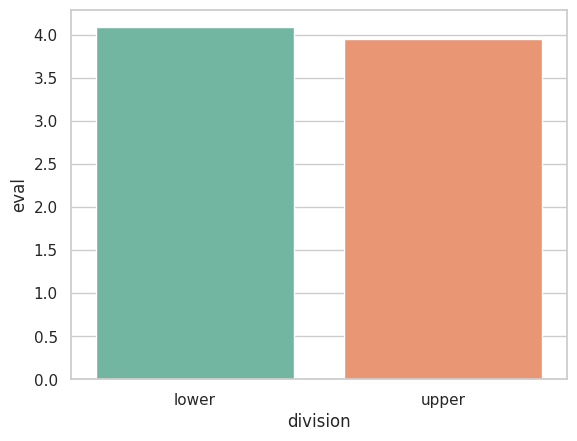

In [ ]:
# dibujamos un diagrama de barras
sns.set(style='whitegrid')
ax = sns.barplot(x='division', y='eval', hue='division', data=division_eval, palette='Set2', legend=False)
plt.show()

### Graficar la relación entre la edad y las puntuaciones de la evaluación docente.

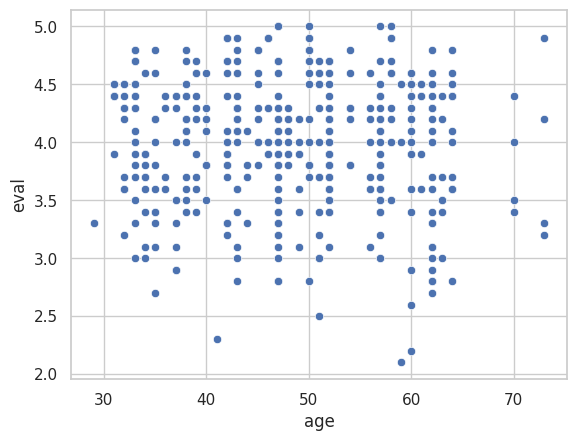

In [ ]:
ax = sns.scatterplot(x='age', y='eval', data=ratings_df)
plt.show()


### Utilizando gráficos de dispersión diferenciados por género, graficar la relación entre la edad y los puntajes de evaluación docente.

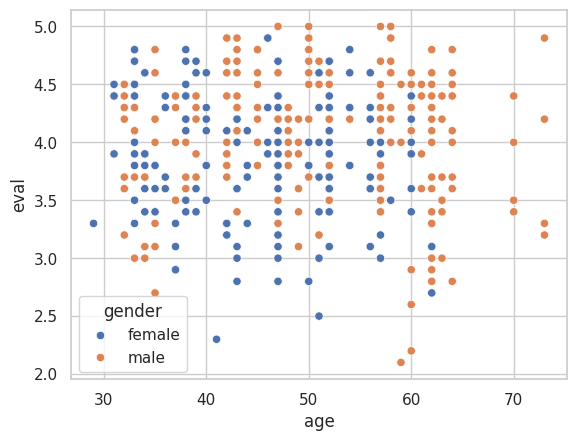

In [ ]:
ax = sns.scatterplot(x='age', y='eval', hue='gender',
                     data=ratings_df)
plt.show()

### Crea un diagrama de caja para las puntuaciones de belleza diferenciadas por créditos.

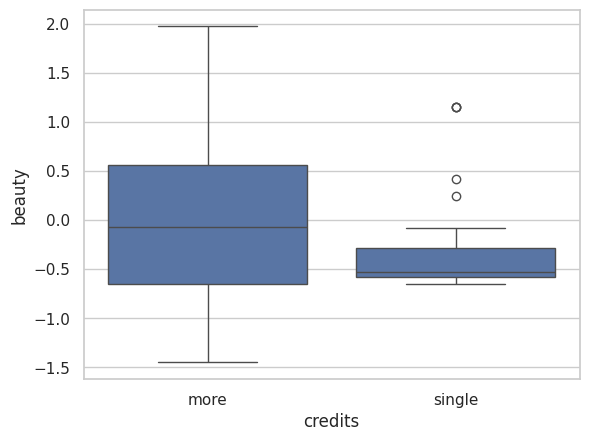

In [ ]:
ax = sns.boxplot(x='credits', y='beauty', data=ratings_df)
plt.show()

### ¿Cuál es el número de cursos impartidos por género?

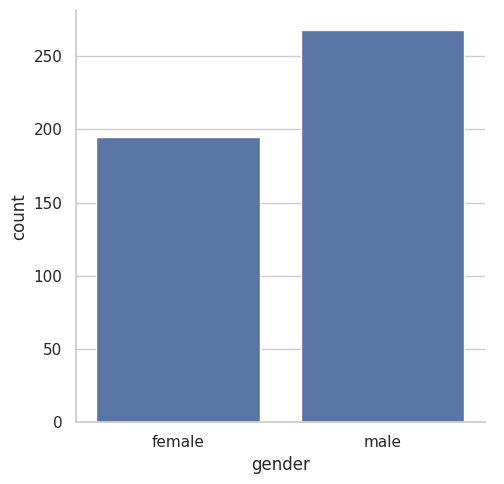

In [ ]:
sns.catplot(x='gender', kind='count', data=ratings_df)
plt.show()

### Crear un histograma grupal de docentes por género y titularidad

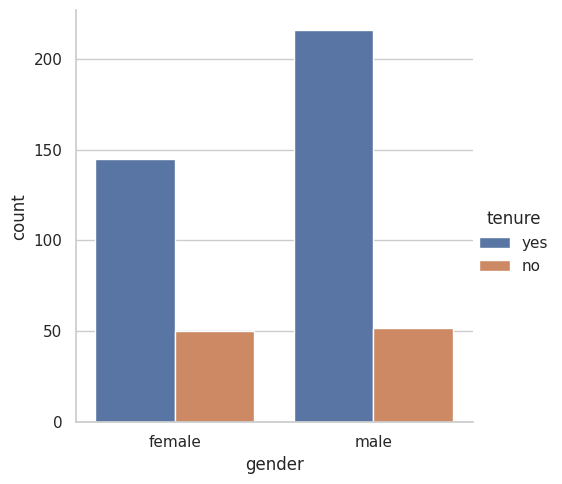

In [ ]:
sns.catplot(x='gender', kind='count', hue='tenure', data=ratings_df)
plt.show()

### Agregar la división como otro factor al histograma anterior

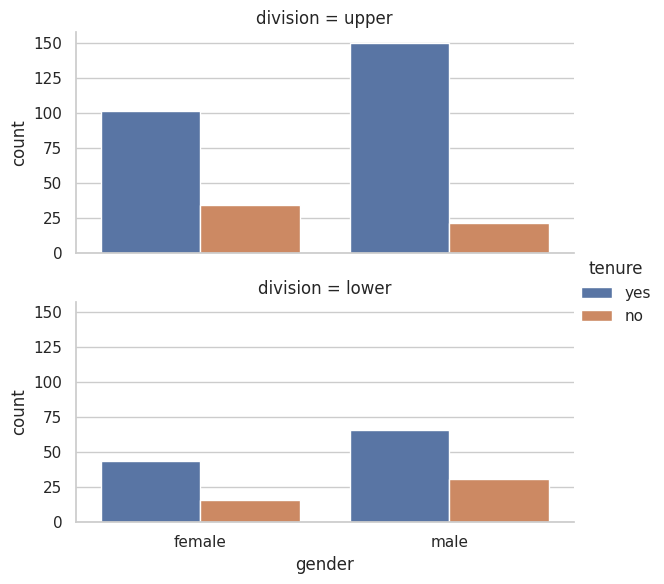

In [ ]:
sns.catplot(x='gender', kind='count', hue='tenure',
            row='division',
            data=ratings_df,
            height = 3, aspect = 2)
plt.show()

### Crear un diagrama de dispersión de puntuaciones de edad y evaluación, diferenciadas por género y permanencia.

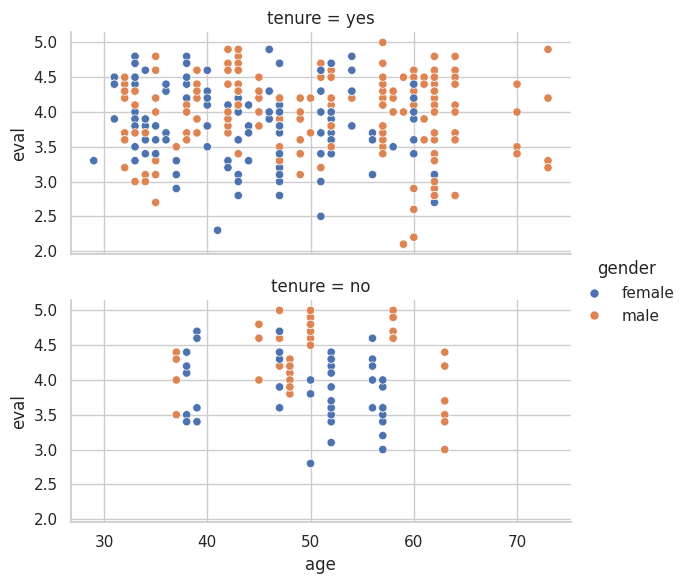

In [ ]:
sns.relplot(x="age", y="eval", hue="gender",
            row="tenure",
            data=ratings_df,
            height = 3, aspect = 2)
plt.show()

### Crear un gráfico de distribución de las puntuaciones de la evaluación docente

Usamos la función displot() de la biblioteca seaborn, establecemos kde = false porque no necesitamos la curva

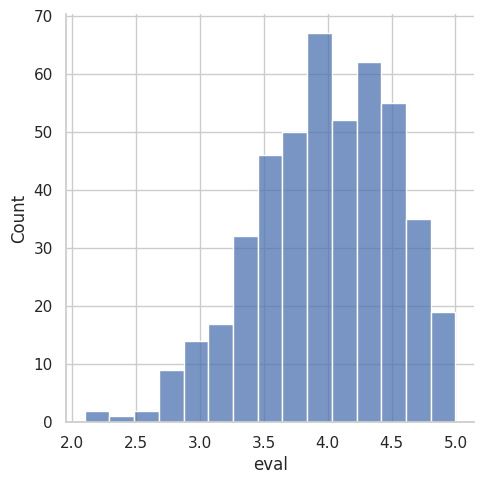

In [ ]:
ax = sns.displot(ratings_df['eval'], kde = False)
plt.show()

### Crear un gráfico de distribución de la puntuación de la evaluación docente con el género como factor

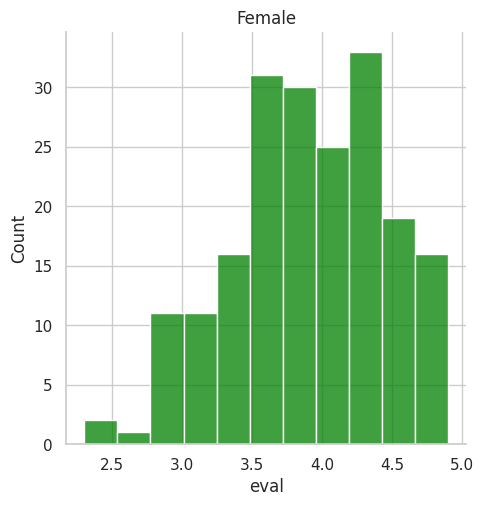

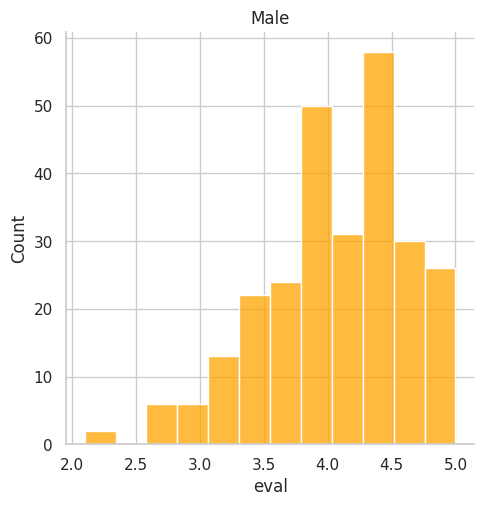

In [ ]:
sns.displot(ratings_df[ratings_df['gender'] == 'female']['eval'], color='green', kde=False).set(title='Female')
sns.displot(ratings_df[ratings_df['gender'] == 'male']['eval'], color="orange", kde=False).set(title='Male')
plt.show()

### Crear un diagrama de caja: edad del instructor por género

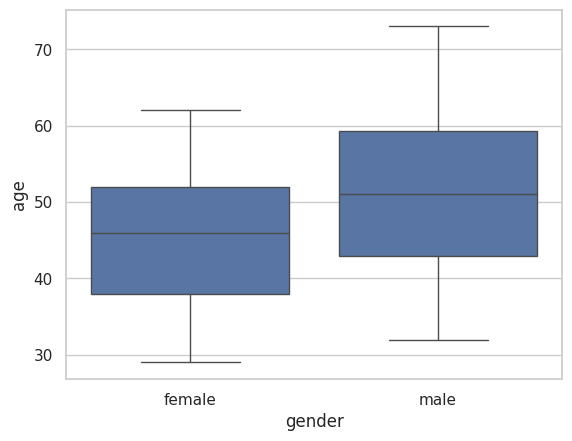

In [ ]:
ax = sns.boxplot(x='gender', y='age', data=ratings_df)
plt.show()

### Comparar la edad con la tenencia y el género

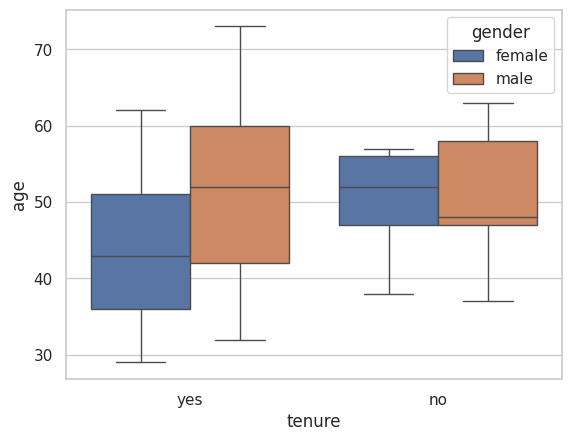

In [ ]:
ax = sns.boxplot(x='tenure', y='age', hue='gender',
                 data=ratings_df)
plt.show()

### Crear una gráfica de distribución de puntuaciones de belleza con el factor "hablante nativo de inglés"

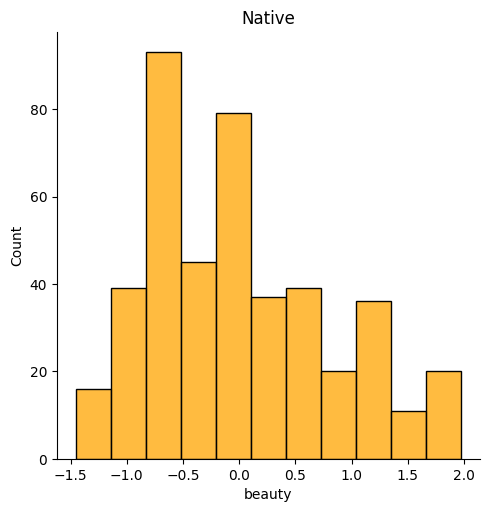

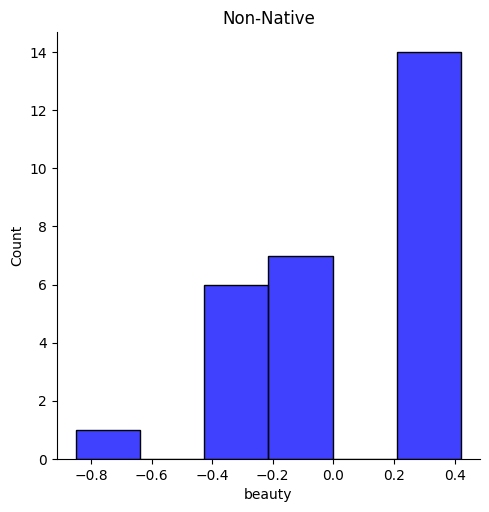

In [5]:
sns.displot(ratings_df[ratings_df['native'] == 'yes']['beauty'], color= 'orange', kde=False).set(title='Native')
sns.displot(ratings_df[ratings_df['native'] == 'no']['beauty'], color='blue', kde=False).set(title='Non-Native')
plt.show()




### Crear un diagrama de caja horizontal de la edad de los instructores por minoría visible

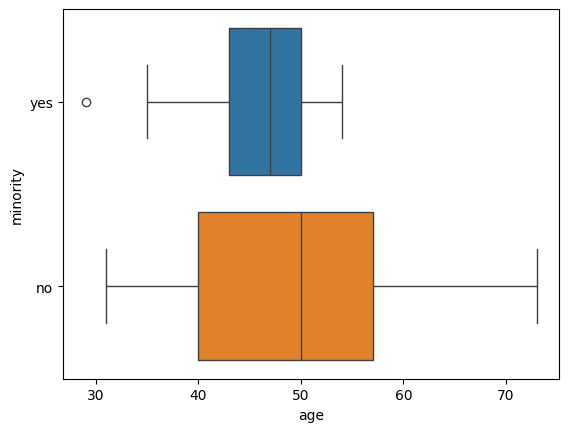

In [14]:
ax = sns.boxplot(x='age', y='minority', hue='minority',
                 data=ratings_df)
plt.show()

#ax = sns.boxplot(x='minority', y='age', hue='minority',
#                data=ratings_df)
#plt.show()

### Crear un gráfico de barras agrupadas de permanencia por minoría y agregue el factor de género

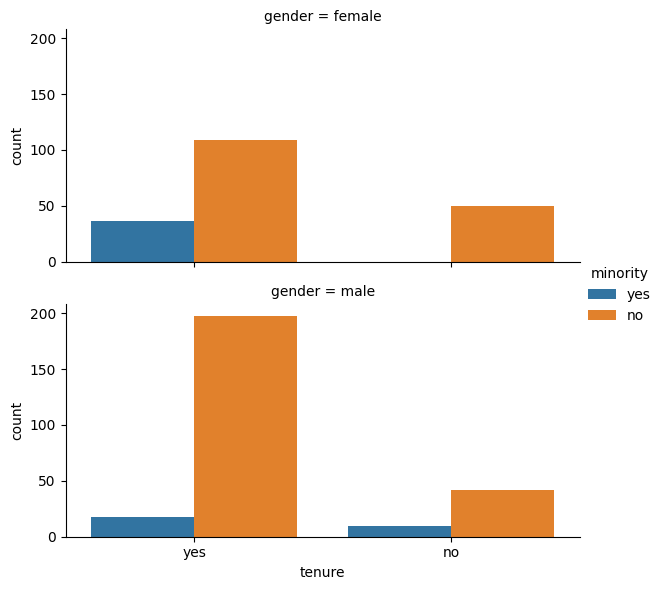

In [18]:
sns.catplot(x='tenure', hue='minority', row='gender',
            kind='count', data=ratings_df,
            height= 3 , aspect= 2)
plt.show()

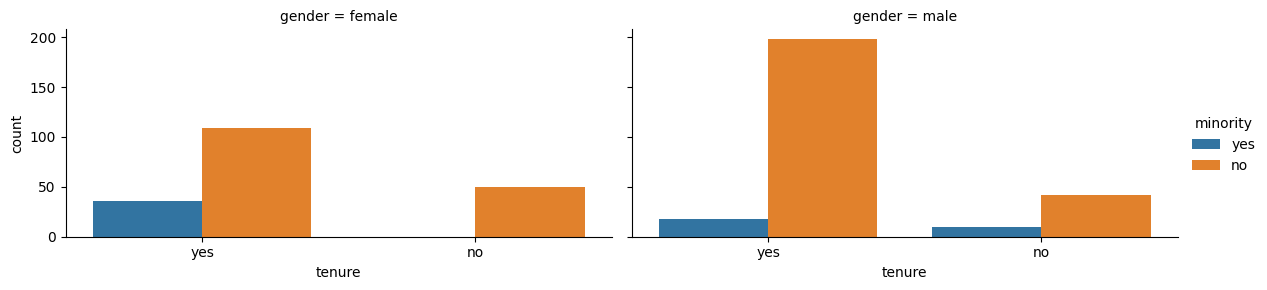

In [20]:
sns.catplot(x='tenure', hue='minority', col='gender',
            kind='count', data=ratings_df,
            height= 3 , aspect= 2)
plt.show()

### Crear un diagrama de caja de la variable edad

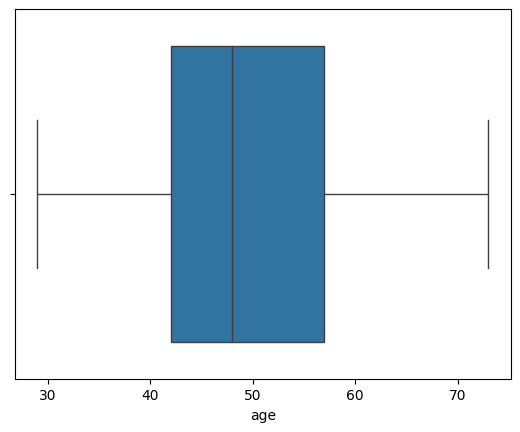

In [23]:
ax = sns.boxplot(x='age',
                 data=ratings_df)
plt.show()

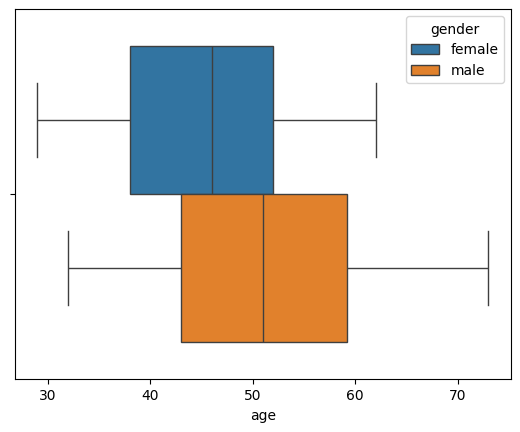

In [22]:
ax = sns.boxplot(x='age', hue='gender',
                 data=ratings_df)
plt.show()

<Axes: xlabel='age', ylabel='eval'>

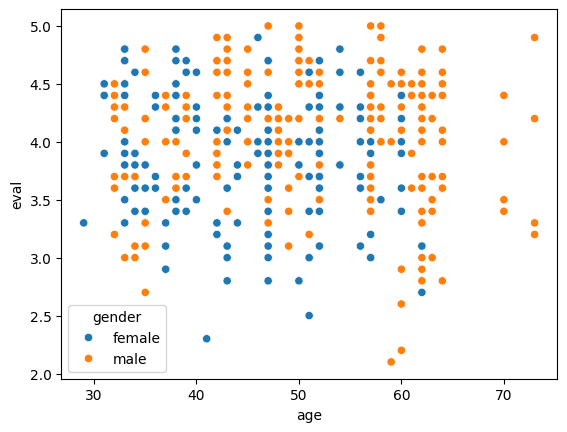

In [25]:
sns.scatterplot(x='age', y='eval', hue='gender', data=ratings_df)